In [1]:
# Initiate libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir

# Initiate custom functions
from stop_beh_main import find_nearest_rt
from stop_beh_main import get_ssrtIntWeight
from stop_beh_main import get_stop_basics


In [2]:
# Define data directory
dataDir = "./data/beh_data/"

# Get list of all .csv files in the directory
filenames = listdir(dataDir)
[ filename for filename in filenames if filename.endswith( '.csv' ) ]

['dar-cmand1DR-20210102_stopBeh.csv',
 'jou-cmand1DR-20210312_stopBeh.csv',
 'jou-cmand1DR-20201124_stopBeh.csv',
 'jou-cmand1DR-20210105_stopBeh.csv',
 'dar-cmand1DR-20210315_stopBeh.csv',
 'dar-cmand1DR-20201214_stopBeh.csv',
 'jou-cmand1DR-20210505_stopBeh.csv',
 'jou-cmand1DR-20201116_stopBeh.csv',
 'dar-cmand1DR-20210607_stopBeh.csv',
 'jou-cmand1DR-20210510_stopBeh.csv',
 'dar-cmand1DR-20201201_stopBeh.csv',
 'dar-cmand1DR-20210612_stopBeh.csv',
 'jou-cmand1DR-20210615_stopBeh.csv',
 'jou-cmand1DR-20210329_stopBeh.csv',
 'jou-cmand1DR-20210430_stopBeh.csv',
 'jou-cmand1DR-20210110_stopBeh.csv',
 'dar-cmand1DR-20210419_stopBeh.csv',
 'dar-cmand1DR-20210525_stopBeh.csv',
 'jou-cmand1DR-20210627_stopBeh.csv',
 'dar-cmand1DR-20210120_stopBeh.csv',
 'jou-cmand1DR-20210610_stopBeh.csv',
 'dar-cmand1DR-20210617_stopBeh.csv',
 'dar-cmand1DR-20210225_stopBeh.csv',
 'jou-cmand1DR-20210302_stopBeh.csv',
 'dar-cmand1DR-20210112_stopBeh.csv',
 'dar-cmand1DR-20210625_stopBeh.csv',
 'jou-cmand1

In [3]:
ssrt = {"high": [], "low": [], "monkey": []}

for file in filenames:
    data = pd.read_csv(dataDir+file)

    # Split data by high and low value
    df_highValue = data.loc[data['value'] == 1]
    df_lowValue = data.loc[data['value'] == 0]

    # Get stopping behavior for high/low values
    (ssd_high, pnc_high, ntr_high) = get_stop_basics(df_highValue)
    (ssd_low, pnc_low, ntr_low) = get_stop_basics(df_lowValue)

    # Get no-stop RT's for high/low values
    nostop_rt_high = df_highValue["rt"].loc[df_highValue["ss_presented"] == 0]
    nostop_rt_low = df_lowValue["rt"].loc[df_lowValue["ss_presented"] == 0]

    stoppingBeh = {'high': {'ssd': ssd_high, 'pnc': pnc_high, 'ntr': ntr_high, 'nostop_rt': nostop_rt_high},
               'low':  {'ssd': ssd_low, 'pnc': pnc_low, 'ntr': ntr_low, 'nostop_rt': nostop_rt_low}}



    ssrt["high"].append(get_ssrtIntWeight(stoppingBeh["high"]))
    ssrt["low"].append(get_ssrtIntWeight(stoppingBeh["low"]))    
    ssrt["monkey"].append(file[0:2])

In [4]:
# Convert dict into dataframe for data vis and analysis
stopping_df = pd.DataFrame(data=ssrt)

a = stopping_df[["high","monkey"]]
a.rename(columns={'high': 'ssrt'}, inplace=True)
a.insert(2, "value", "high")

b = stopping_df[["low","monkey"]]
b.rename(columns={'low': 'ssrt'}, inplace=True)
b.insert(2, "value", "low")

stopping_df_value = pd.merge(a,b,'outer')


/Users/stevenerrington/opt/anaconda3/envs/learn-python/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


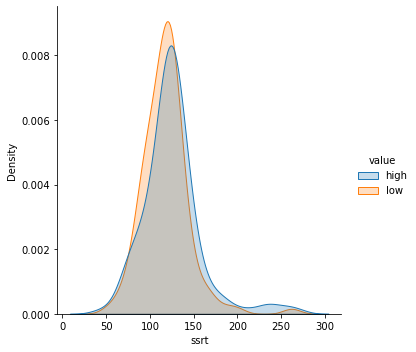

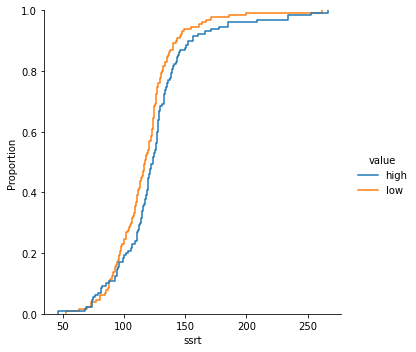

In [5]:
sns.displot(stopping_df_value, x="ssrt", hue="value", kind="kde", fill=True)
sns.displot(stopping_df_value, x="ssrt", hue="value", kind="ecdf")

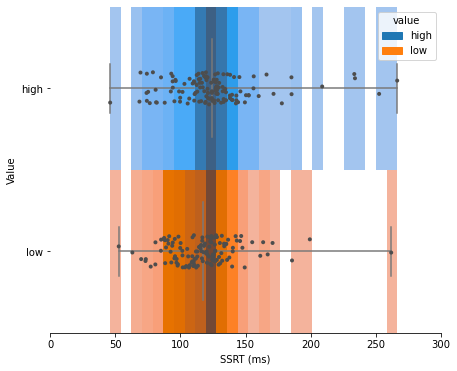

In [19]:
f, ax = plt.subplots(figsize=(7, 6))

# Plot boxplots of SSRT estimates
sns.histplot(x="ssrt", y="value", hue="value", data=stopping_df_value)

# Plot boxplots of SSRT estimates
sns.boxplot(x="ssrt", y="value", data=stopping_df_value,
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="ssrt", y="value", data=stopping_df_value,
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.set(xlabel="SSRT (ms)")
ax.set(ylabel="Value")
ax.set(xlim=(0, 300)) 
sns.despine(trim=True, left=True)